#Gomathy -  Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [313]:
# Import the appropriate libraries with aliases
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


In [245]:
north_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [314]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [315]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [316]:
#Code Used:
north_df["Rep ID"].value_counts()


Brent     37
Lilly     30
Todd      29
Duke      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

#### EDA Question 1B:  How many reps are in the South branch?  

In [317]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [318]:
#Code Used:
south_df["Rep ID"].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [319]:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [320]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [321]:
# Code Used:
combined_Timedf= pd.concat([north_df['Time Block'],south_df['Time Block']])
combined_Timedf.value_counts()
                            

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch =9 reps
- 1b) Reps in the South Branch =11 reps 


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There are many missing data in 'Incoming wait time' column in both the north_df and south_df. We can drop this column if it is not necessary for the given bussiness issue. Ifelse we can fill null by mean of that column. Here I have filled the null values with mean because we might need this incoming wait time details to figure out which call center need more reps.

In [322]:
#Checking for missing values and duplicates in north_df
# Code Used
# Add Additional Cells as needed.
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [323]:
income_wait_time_mean = north_df["Incoming Wait Time"].agg('mean')
north_df["Incoming Wait Time"].fillna(income_wait_time_mean,inplace = True)
north_df["Incoming Wait Time"].isnull().sum()

0

In [324]:
north_df.duplicated().sum()

0

In [325]:
# Checking for missing values and duplicates in south_df

south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [326]:
income_wait_time_mean = south_df["Incoming Wait Time"].agg('mean')
south_df["Incoming Wait Time"].fillna(income_wait_time_mean,inplace = True)
south_df["Incoming Wait Time"].isnull().sum()

0

In [327]:
south_df.duplicated().sum()

0

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I rectified by replacing the "NO" by true and"YES' by False. So now we can find the difference between the values using the value_counts() function which I have done below

In [328]:
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [329]:
north_df = north_df.replace({"Sale":{'YES':True,'NO':False}})
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,False,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,False,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,False,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,False,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,False,0,0,8,2,1.0,4,1


In [330]:
north_df["Sale"].value_counts()

False    234
True      10
YES        1
Name: Sale, dtype: int64

In [331]:
#Code Used
# Add Additional Cells as needed.
south_df["Sale"].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

In [332]:
# Here in south_df there is no confusion with the yes values. But still we have to replace the YES by True and NO by False because of the changes we made to the north_df.
south_df = south_df.replace({"Sale":{'YES':True,'NO':False}})
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,False,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,False,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,False,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,False,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,False,0,0,8,3,1.0,3,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 
There is no duplicates in the north_df and south_df dataframes.

In [24]:
#Code Used
# Add Additional Cells as needed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 
Yes these datasets have unnecessary data. If there is any unnecessary data in dataset we can just drop that rows or column depending upon the bussiness issues. Here we have "unnamed : 0" column so we can drop it.

In [23]:
#Code Used
#Here I dropped the column "unnamed : 0" below after concating the north_df and south_df into df instead of droping in north 
  # and south branch seperatly

# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [333]:
# Create dataframe for the entire company named df

df = pd.concat([north_df,south_df])
df.head(5)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,False,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,False,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,False,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,False,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,False,0,0,8,2,1.0,4,1


In [334]:
df = df.drop(["Unnamed: 0","Lost Call"],axis = 1)
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,False,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,False,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,False,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,False,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,False,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,False,0,10,3,3.0,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,False,0,12,3,3.0,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,False,0,9,3,3.0,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,False,0,10,1,3.0,2,1


In [335]:
df.shape

(559, 13)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent ->  37 calls
- South Branch = Eric  ->  35 calls


In [336]:
# Code Used
 
df.groupby(["Rep ID","Branch"]).sum("Calls").sort_values("Calls",ascending = False)

# Add Additional Cells as needed.

,,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,
Brent,North,1,362,71,105.414634,117,37
Eric,South,0,361,54,98.000000,112,35
Randy,South,1,320,66,98.000000,98,33
Sandy,South,0,325,60,91.000000,100,32
Helga,South,2,292,58,96.000000,95,31
Lilly,North,2,307,59,91.878049,88,30
Todd,North,0,296,58,91.121951,97,29
Duke,North,0,292,56,84.731707,85,29
George,South,0,298,53,89.000000,87,29


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86 %
- South Branch = 1.27 %
- Company Wide = 1.97 %
- Do any of these fall out of the optimal range of 2-5%? 
    Yes, the south branch and the company wide df is falling out of the optimal range. 

In [337]:
#finding  the average call abandonment rates for north_df

(north_df["Abandoned"].sum()/north_df["Calls"].sum())*100

2.857142857142857

In [338]:
#finding  the average call abandonment rates for south_df


(south_df["Abandoned"].sum()/south_df["Calls"].sum())*100

1.2738853503184715

In [339]:
#finding  the average call abandonment rates for  entire company df
(df["Abandoned"].sum()/df["Calls"].sum())*100

1.9677996422182469

In [340]:
# Code Used
dic = {"Abandoned":['mean','count']}
agg_df = df.groupby(["Branch","Abandoned"]).agg(dic)
agg_df
# Add Additional Cells as needed.

Abandoned      
                      mean count
Branch Abandoned                
North  0               0.0   238
       1               1.0     7
South  0               0.0   310
       1               1.0     4

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24 %
- South Branch = 38.09 %
- Company Wide = 38.94 % 

In [341]:
# We are finding the no of calls answered (that is no of  incoming calls answered) for the north_df

incomingcalls_north_df = north_df.groupby('Incoming or Outgoing')['Calls'].sum()['Incoming']
incomingcalls_north_df

82

In [342]:
# Code Used
((north_df["Incoming Wait Time"]<=2).sum()/incomingcalls_north_df)*100

# Add Additional Cells as needed.

40.243902439024396

In [343]:
# We are finding the no of calls answered (that is no of  incoming calls answered) for the south_df

incomingcalls_south_df = south_df.groupby('Incoming or Outgoing')['Calls'].sum()['Incoming']
incomingcalls_south_df

126

In [344]:
((south_df["Incoming Wait Time"]<=2).sum()/incomingcalls_south_df)*100


38.095238095238095

In [345]:
# We are finding the no of calls answered (that is no of  incoming calls answered) for the total 
          #company df


incomingcalls_df = df.groupby('Incoming or Outgoing')['Calls'].sum()['Incoming']
incomingcalls_df

208

In [346]:
((df["Incoming Wait Time"]<=2).sum()/incomingcalls_df)*100

38.94230769230769

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.0
- Company Wide in seconds = 3.02


In [347]:
# Code Used 
#Average speed in second in north_df
north_df["Incoming Wait Time"].mean()

3.0487804878048683

In [348]:
south_df["Incoming Wait Time"].mean()

3.0

In [349]:
df["Incoming Wait Time"].mean()

3.0213796413456047

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

bar graph - visualization 1

Here I used bar graph. This graph clearly explains us the types of queues (x-axis) and the average abandonment rate in the y-axis. These bars shows the average abandonment rate per Queues at the very first look on the visualization.

Text(0, 0.5, 'avg_abandonment_per_queue')

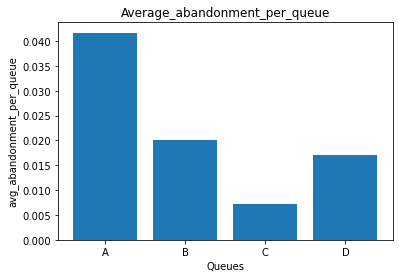

In [350]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
#queue_dict
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
x=list(abandonment_rates.keys())
y=list(abandonment_rates.values())
plt.bar(x,y)
plt.title("Average_abandonment_per_queue")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queues',color = 'black')
plt.ylabel('avg_abandonment_per_queue',color = 'black')


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why:


I selected scatter plot : visualization:3

T'Rep ID' in x-axis and 'service level percentage' in y axis. This chart shows the service level percentage and average speed of answer for each rep in the North Branch.

'Incoming Wait Time' with different shades of pink in the right top conner of the chart indicates the average speed of answer for each rep. The shades shows order, the lighter the shades lesser the average speed of answer) 




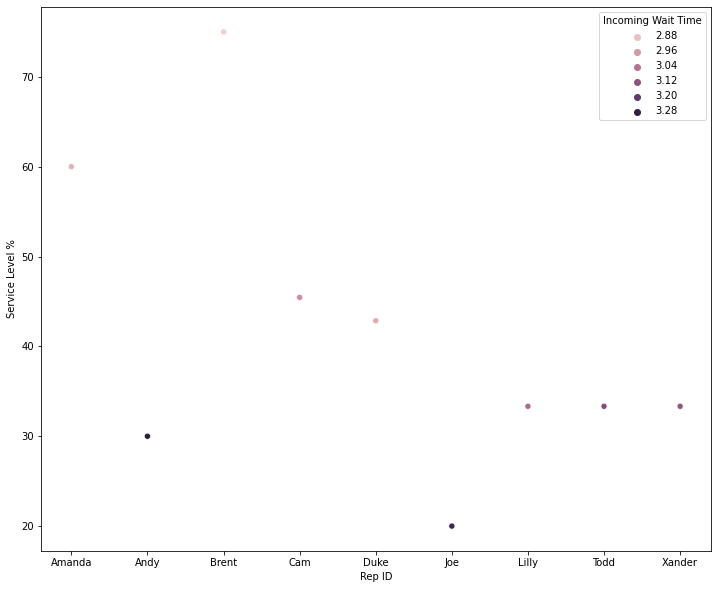

In [352]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
north_plt
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
#service_level["Service Level %"].mean() 
#Your Code Here:
service_avgmerged =pd.merge(north_plt,service_level,on='Rep ID')

sns.scatterplot(data=service_avgmerged,x="Rep ID",y='Service Level %',hue='Incoming Wait Time')

plt.rcParams['figure.figsize'] = [12, 10]

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

Here I Tried stacked bar chart and grouped bar chart. Both chart helped me to visualize the number of incoming and outgoing in a different ways but still helpful.

Stacked bar chart:visualization 3

This chart shows the total number of incoming and outgoing calls all together by just looking at the height of the Incoming bar and outgoing bar.Secondly we can also find the number of incoming and outgoing for each type of call purpose by just looking at the different colors that is stacked as a single bar indicate the different call purpose as colors mentioned in the left top corner of the visualization 3

Grouped bar chart:visualization 4

This chart helps to view the same but in more easy way immediatly once we see the graph. By viewing this graph we can find there is no outgoing calls in 'Complaint' call purpose.So this Graph helps us to visualise in more precised way by just looking at the graph one glance.



Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


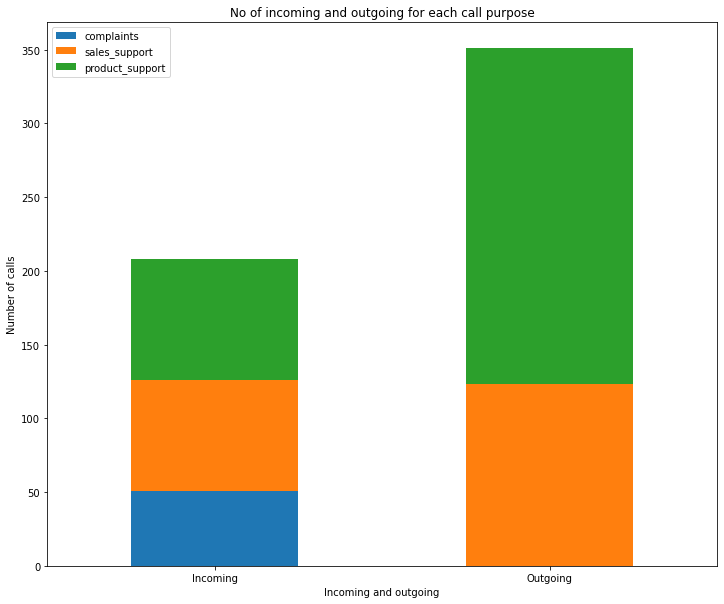

In [353]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()

sales_support = purpose_counts["Sales Support"].to_dict()

product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
df = pd.DataFrame({'complaints':complaints,'sales_support':sales_support,'product_support':product_support}).reset_index()
# dict ={'complaints':complaints,'sales_support':sales_support,'product_support':product_support}
# x = dict.keys()
# y= dict.values()
ax = df.plot(x='index', y=['complaints','sales_support','product_support'], kind="bar", rot=0,stacked = True)
plt.title('No of incoming and outgoing for each call purpose')
plt.xlabel('Incoming and outgoing')
plt.ylabel('Number of calls')
# plt.bar(x,y)
plt.show()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<AxesSubplot:title={'center':'No of incoming and outgoing for each call purpose'}, xlabel='Call purpose'>

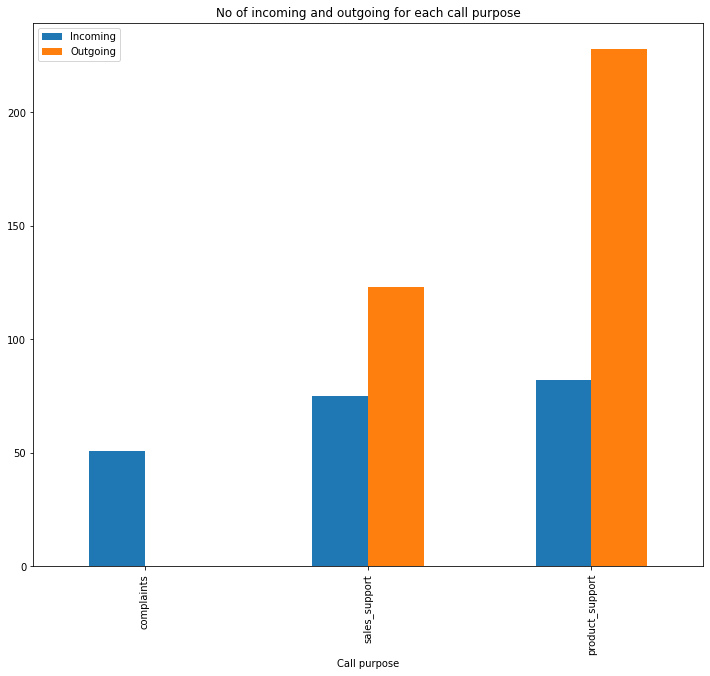

In [354]:
#Here I created another visualization 4 here:
#  For each type of call purpose, how many calls are outgoing vs. incoming? but 
   # tried bar chart instead of stacked bar chart above
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
df = pd.concat([north_df,south_df])

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()

sales_support = purpose_counts["Sales Support"].to_dict()

product_support = purpose_counts["Product Support"].to_dict()


dict ={'complaints':complaints,'sales_support':sales_support,'product_support':product_support}

df1 = pd.DataFrame(dict['complaints'],index=['complaints'])
df2 = pd.DataFrame(dict['sales_support'],index=['sales_support'])
df3 = pd.DataFrame(dict['product_support'],index=['product_support'])
df = pd.concat([df1,df2,df3])
df.index.name = 'Call purpose'

df.plot.bar(title = 'No of incoming and outgoing for each call purpose')


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


In [355]:
south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
south_plt
# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# # Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level["Service Level %"].mean()

36.198965176237905

#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 


1. Average_abandonment rate:
when we look at the visualization it is clear that queue A and queue B bars (north branch Queues) are higher than the queue C and queue D (south branch Queues)
north_df > south_df

2. Average service level percentage:
north_df = 41.47907647907647     south_df= 36.198965176237905

3. Average speed of answer:
North Branch in seconds = 3.04         South Branch in seconds = 3.0

From the above KPIs it is clear eventhough the abandonment rate is higher in the north branch the service is good in the north when compared to the south branch.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer:

Number of reps in the south branch is higher than the north branch. Eventhough the service is good in the north branch the average abandonment rate is too high. We cannot predict the sevice accuratly without taking the abandonment rate into account.  
I hope North branch would benefit from the extra help.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 

Yes, we could have done analysis better if there was an accurate 'Incoming Wait Time' values instead of many null values which we imputed by mean.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why:


I selected bar graph. This graph shows us the calls in each time block for each call purpose.Bar graph is easy to plot for group by dataframes.

Text(0.5, 1.0, 'Calls in each time block for each call purpose')

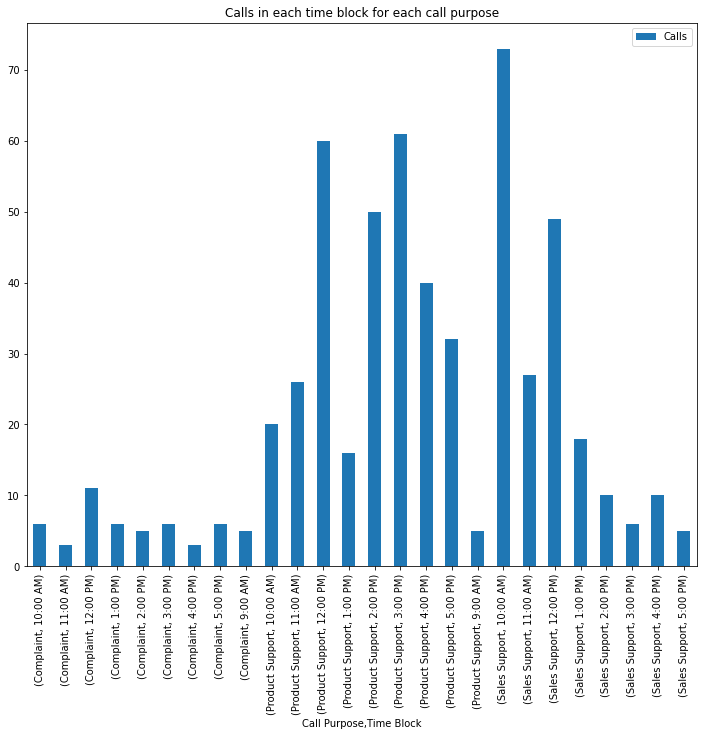

In [357]:
# Create your Bonus Mission visualization here!

df = pd.concat([north_df,south_df])
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
grouped_call_times = call_times.groupby(["Call Purpose",'Time Block']).sum()
grouped_call_times.plot.bar()
plt.title('Calls in each time block for each call purpose')
# Use groupby and get_group to select which call purpose to plot: